In [1]:
# Load CIFAR-10 data set
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


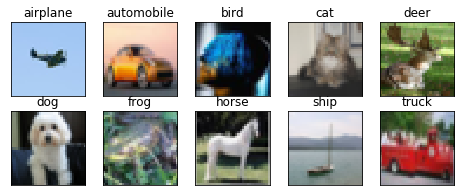

In [3]:
# Show examples from each class
import numpy as np
import matplotlib.pyplot as plt

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    rnd_img = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[rnd_img,::], (0, 1, 2))
    plt.imshow(im)
plt.show()

In [4]:
# Data pre-processing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [5]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [6]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 29us/step - loss: 1.9276 - acc: 0.3168 - val_loss: 1.8722 - val_acc: 0.3401
Epoch 2/20
50000/50000 [==============================] - 1s 27us/step - loss: 1.8215 - acc: 0.3640 - val_loss: 1.8249 - val_acc: 0.3599
Epoch 3/20
50000/50000 [==============================] - 1s 27us/step - loss: 1.8004 - acc: 0.3706 - val_loss: 1.8084 - val_acc: 0.3674
Epoch 4/20
50000/50000 [==============================] - 1s 28us/step - loss: 1.7753 - acc: 0.3832 - val_loss: 1.8036 - val_acc: 0.3679
Epoch 5/20
50000/50000 [==============================] - 1s 28us/step - loss: 1.7742 - acc: 0.3847 - val_loss: 1.8188 - val_acc: 0.3649
Epoch 6/20
50000/50000 [==============================] - 1s 29us/step - loss: 1.7668 - acc: 0.3877 - val_loss: 1.7973 - val_acc: 0.3735
Epoch 7/20
50000/50000 [==============================] - 1s 29us/step - loss: 1.7544 - acc: 0.3924 - val_loss: 1.7916 - val_acc

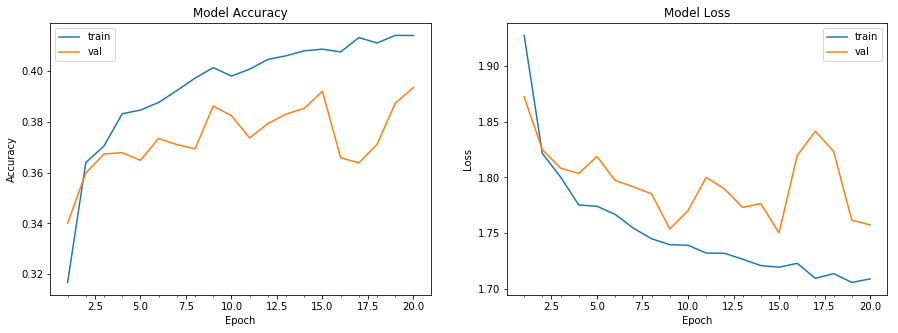

Training MLP took 28.221973180770874 seconds


In [7]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")